In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('max_columns', None)

In [ ]:
data= pd.read_csv('dataset_diabetes/diabetes_binary_health_indicators_BRFSS2015.csv')
print(data.shape)

(253680, 22)


In [ ]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
data.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
for column in data.columns:
    print(column, ":", data[column].unique())

Diabetes_binary : [0. 1.]
HighBP : [1. 0.]
HighChol : [1. 0.]
CholCheck : [1. 0.]
BMI : [40. 25. 28. 27. 24. 30. 34. 26. 33. 21. 23. 22. 38. 32. 37. 31. 29. 20.
 35. 45. 39. 19. 47. 18. 36. 43. 55. 49. 42. 17. 16. 41. 44. 50. 59. 48.
 52. 46. 54. 57. 53. 14. 15. 51. 58. 63. 61. 56. 74. 62. 64. 66. 73. 85.
 60. 67. 65. 70. 82. 79. 92. 68. 72. 88. 96. 13. 81. 71. 75. 12. 77. 69.
 76. 87. 89. 84. 95. 98. 91. 86. 83. 80. 90. 78.]
Smoker : [1. 0.]
Stroke : [0. 1.]
HeartDiseaseorAttack : [0. 1.]
PhysActivity : [0. 1.]
Fruits : [0. 1.]
Veggies : [1. 0.]
HvyAlcoholConsump : [0. 1.]
AnyHealthcare : [1. 0.]
NoDocbcCost : [0. 1.]
GenHlth : [5. 3. 2. 4. 1.]
MentHlth : [18.  0. 30.  3.  5. 15. 10.  6. 20.  2. 25.  1.  4.  7.  8. 21. 14. 26.
 29. 16. 28. 11. 12. 24. 17. 13. 27. 19. 22.  9. 23.]
PhysHlth : [15.  0. 30.  2. 14. 28.  7. 20.  3. 10.  1.  5. 17.  4. 19.  6. 12. 25.
 27. 21. 22.  8. 29. 24.  9. 16. 18. 23. 13. 26. 11.]
DiffWalk : [1. 0.]
Sex : [0. 1.]
Age : [ 9.  7. 11. 10.  8. 13.  4.  6

In [ ]:
data.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [ ]:
category_columns = [col for col, dtype in data.dtypes.items() if dtype.name == 'category']

In [ ]:
float_columns = [col for col, dtype in data.dtypes.items() if dtype == 'float64']

In [ ]:
print(category_columns)

[]


In [ ]:
print(float_columns)

['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


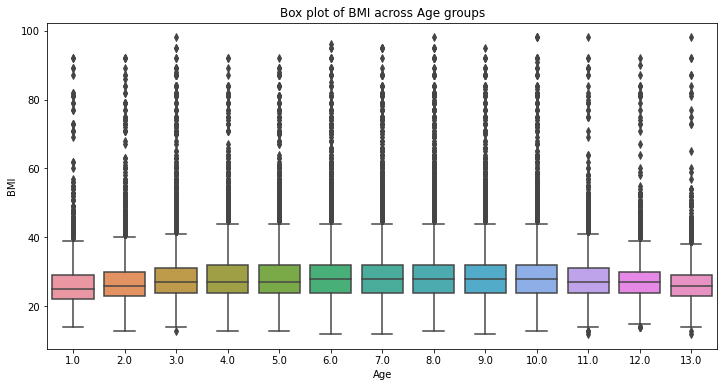

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Age', y='BMI')
plt.title('Box plot of BMI across Age groups')
plt.show()

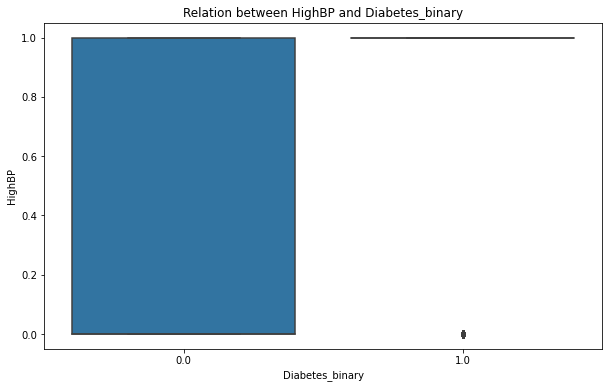

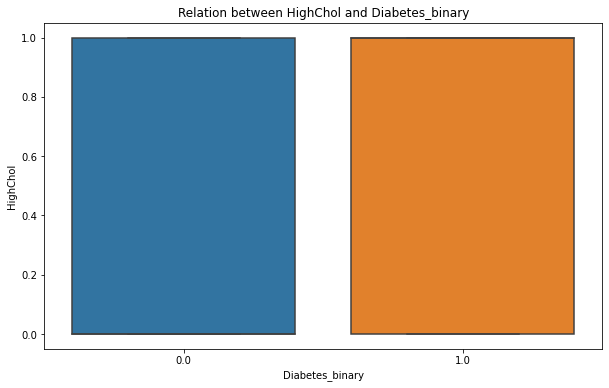

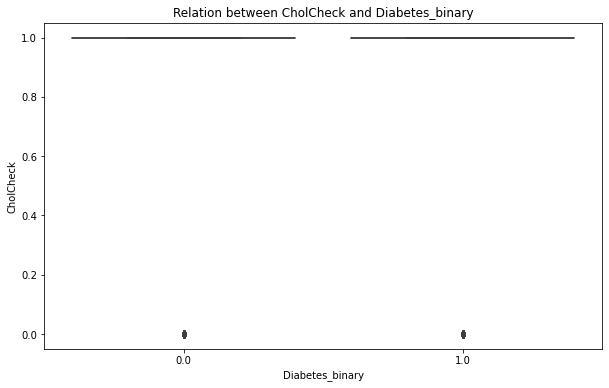

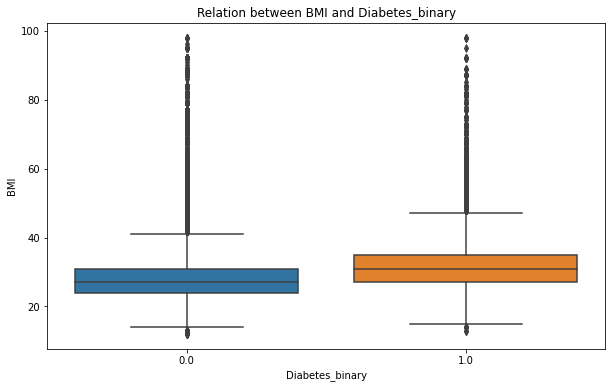

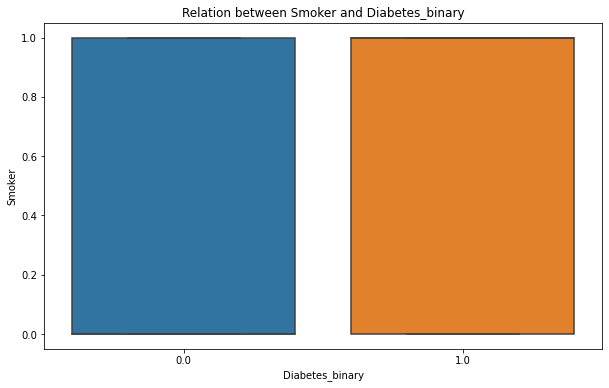

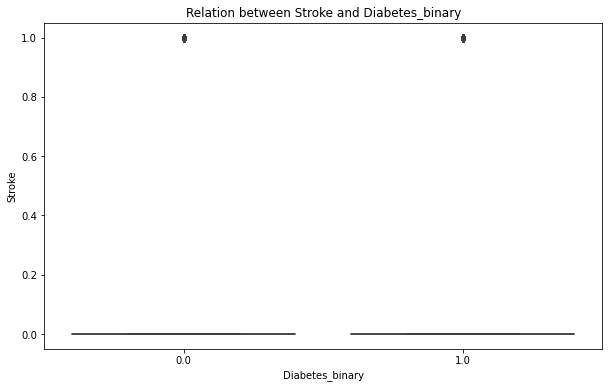

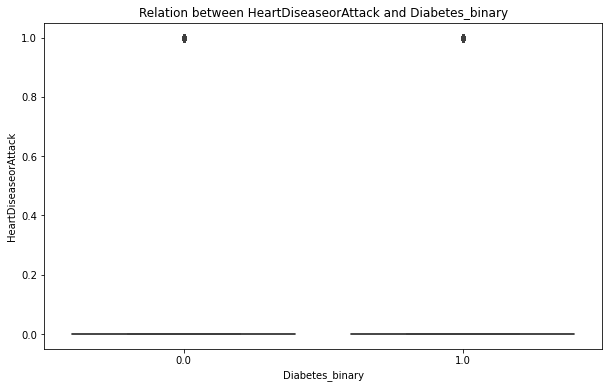

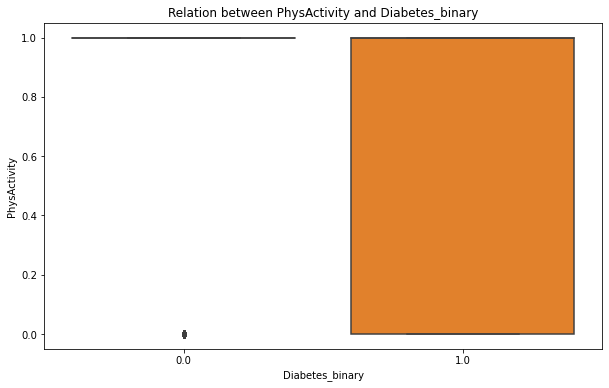

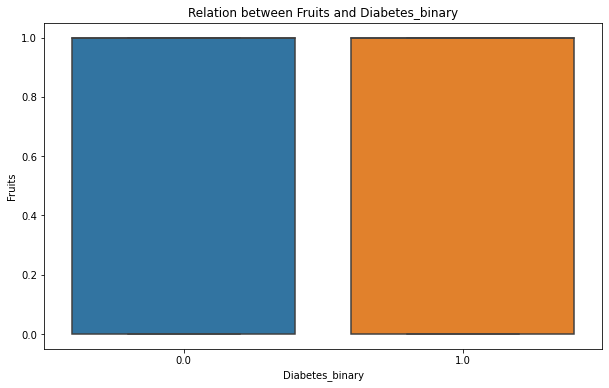

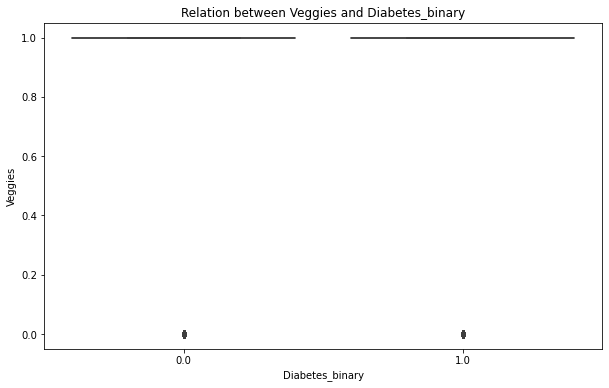

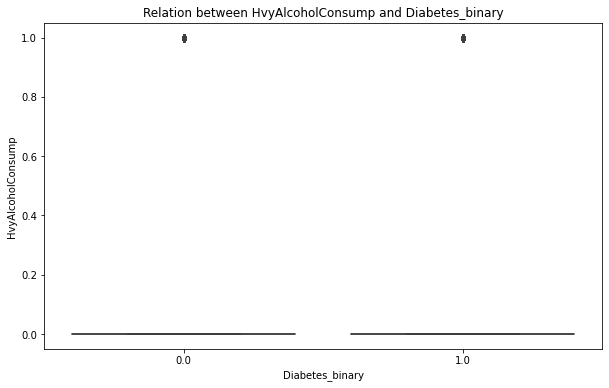

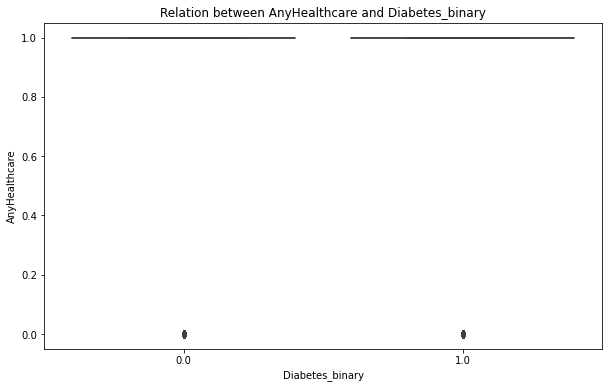

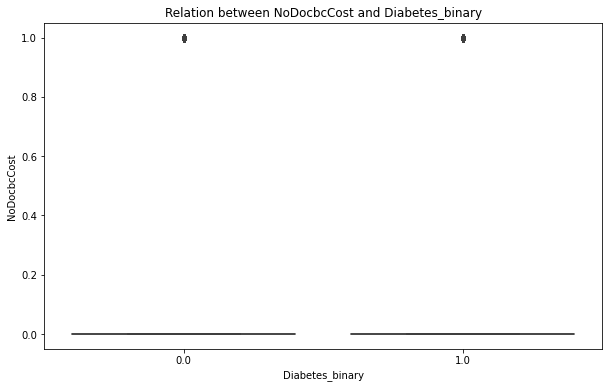

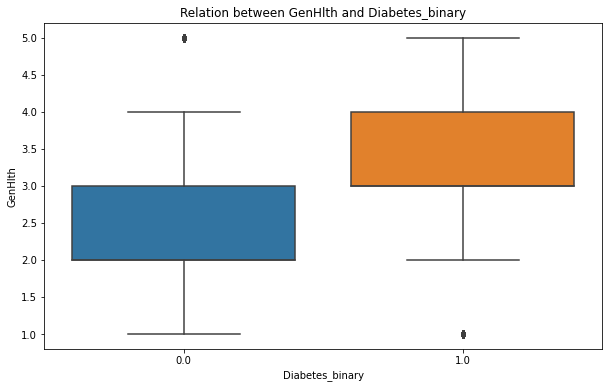

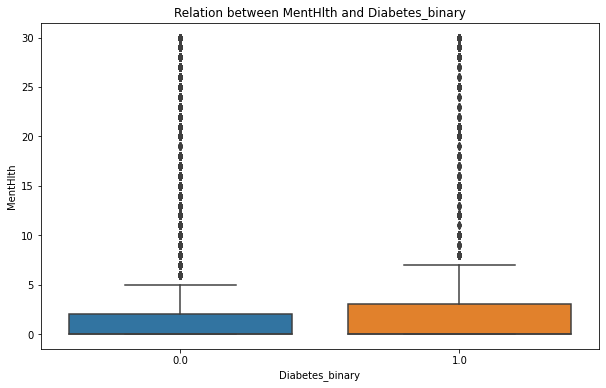

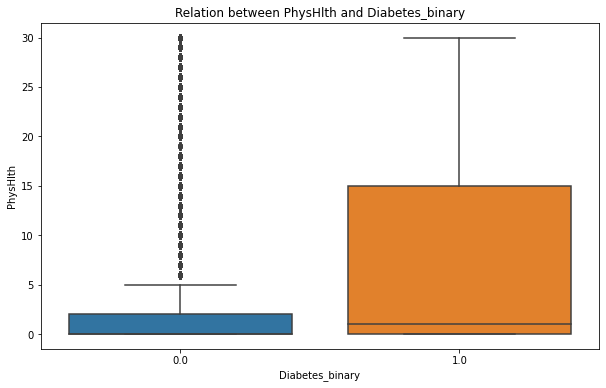

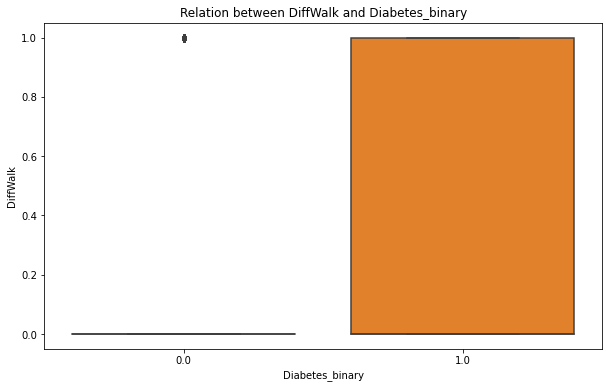

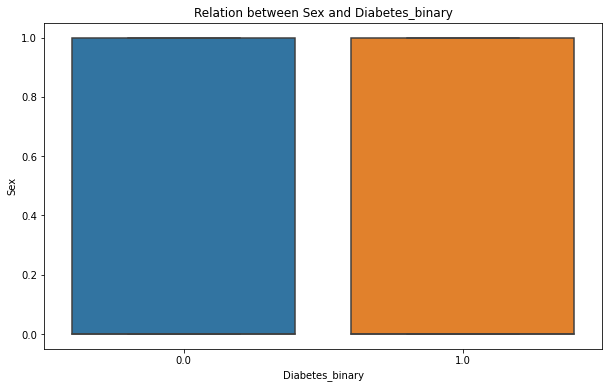

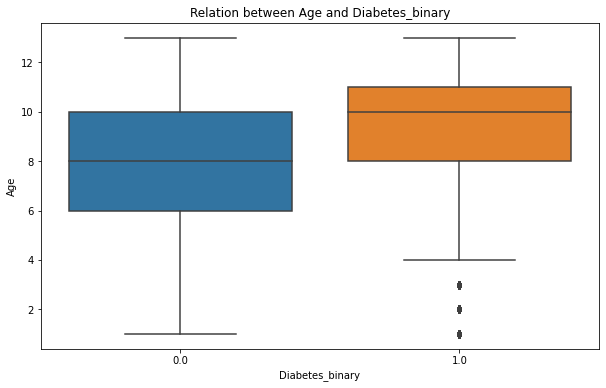

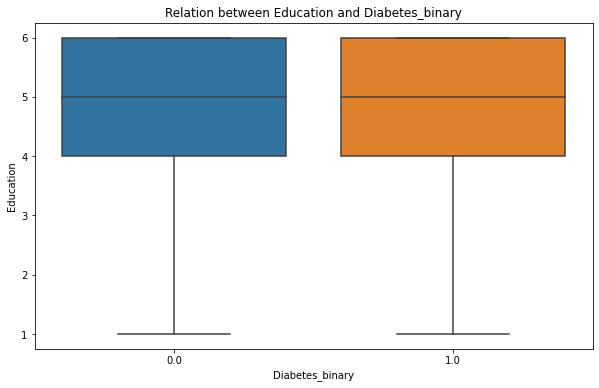

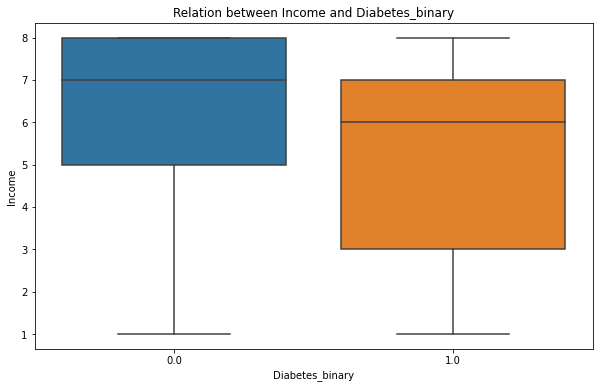

In [ ]:
# Numerical Feature vs. Categorical Target
numerical_columns = [col for col in data.columns if col not in category_columns and col != 'Diabetes_binary']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Diabetes_binary', y=col, data=data)
    plt.title(f'Relation between {col} and Diabetes_binary')
    plt.show()

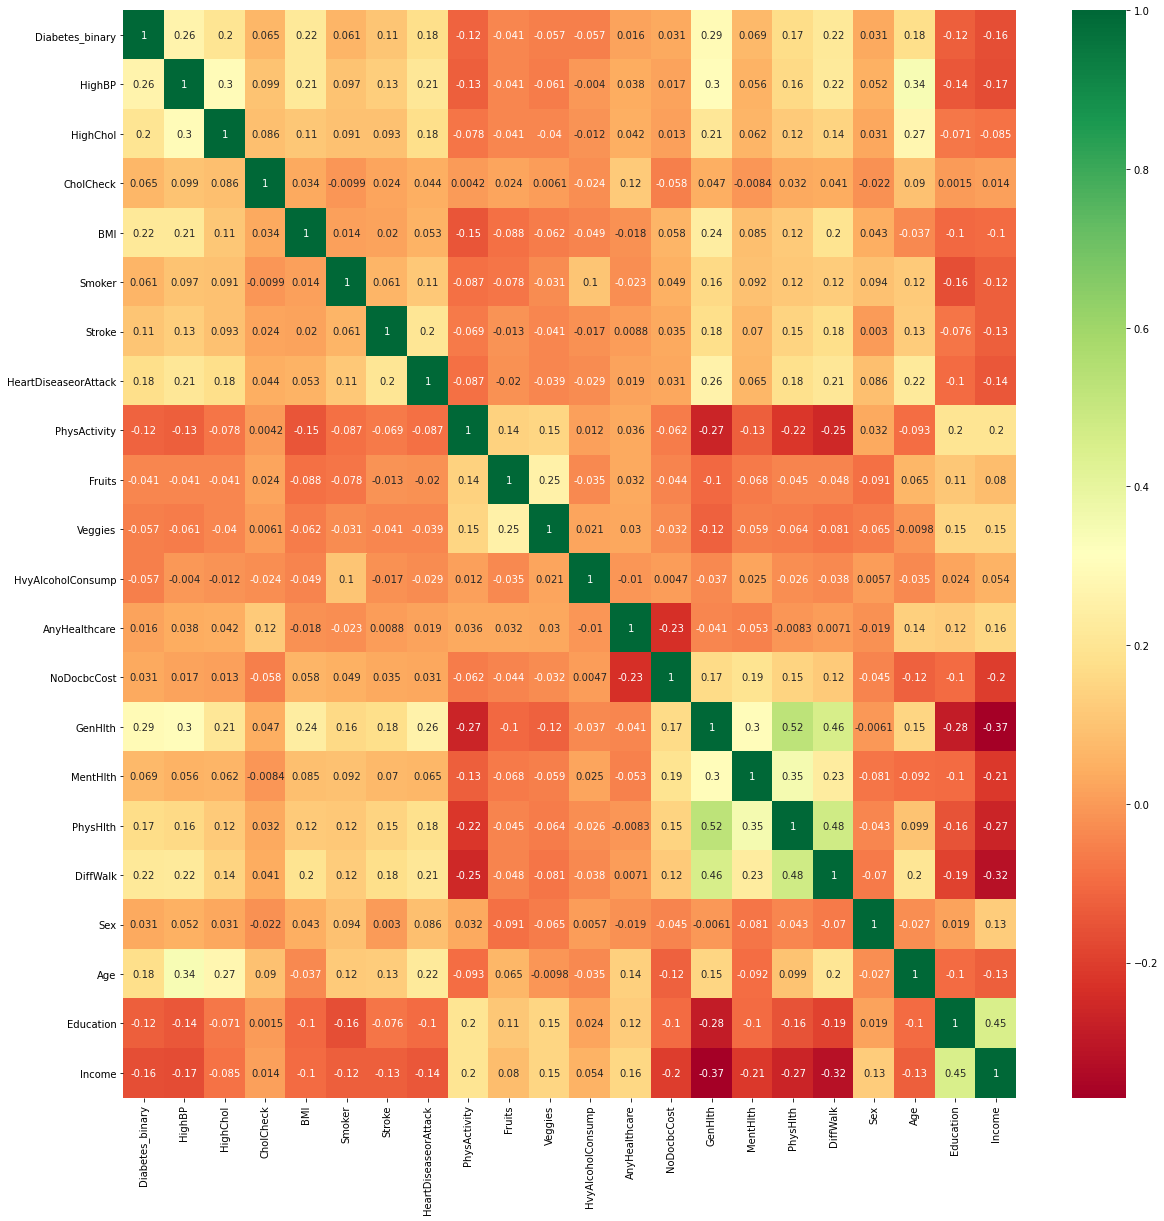

In [ ]:
import seaborn as sns
cormat= data.corr()
top_corr_features= cormat.index
plt.figure(figsize=(20,20))
# plot heat map
g= sns.heatmap(data[top_corr_features].corr(), annot= True, cmap= 'RdYlGn')

In [ ]:
data.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.263129,0.200276,0.064761,0.216843,0.060789,0.105816,0.177282,-0.118133,-0.040779,-0.056584,-0.057056,0.016255,0.031433,0.293569,0.069315,0.171337,0.218344,0.031430,0.177442,-0.124456,-0.163919
HighBP,0.263129,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.200276,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.064761,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.216843,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.060789,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.105816,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.177282,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.118133,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040779,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


In [ ]:
# Variables with very less variance
data.var().sort_values()

CholCheck                0.035937
Stroke                   0.038925
AnyHealthcare            0.046552
HvyAlcoholConsump        0.053039
NoDocbcCost              0.077091
HeartDiseaseorAttack     0.085315
Diabetes_binary          0.119920
DiffWalk                 0.139925
Veggies                  0.153018
PhysActivity             0.184186
Fruits                   0.231976
HighChol                 0.244243
HighBP                   0.244960
Sex                      0.246442
Smoker                   0.246771
Education                0.971751
GenHlth                  1.141644
Income                   4.289652
Age                      9.328262
BMI                     43.674839
MentHlth                54.950296
PhysHlth                76.002675
dtype: float64

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [ ]:
# ML classifiers
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier

In [ ]:
# Generate X and y datasets and create train-test split
data2 = data.dropna()
X = data2.drop(columns='Diabetes_binary')
y = data2['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)

In [ ]:
X_train.head(1)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
186025,1.0,1.0,1.0,27.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,5.0,0.0,30.0,1.0,0.0,13.0,5.0,8.0


In [ ]:
X_train.dtypes

HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [ ]:
# category_features = category_columns[1:]
# X_categorical = X[category_features]
# X_continuous = X[float_columns]


In [ ]:
# preprocess = make_column_transformer((OneHotEncoder(handle_unknown='ignore', drop=None),
#                               X_categorical.columns),
#                              (StandardScaler(), X_continuous.columns))

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Make Pipeline Without SMOTE
# pipe = Pipeline([('preprocess', preprocess),
# #                   ('xgb', XGBClassifier(objective='multi:softprob', eval_metric='mlogloss'))
#                  ('xgb', XGBClassifier())
#                 ])
# pipe.fit(X_train, y_train)
# pipe.score(X_test, y_test)

Fitting KNN model ...
KNN model has roc =  [0.18656057 0.18603006 0.19306931 0.19359972 0.19239611]
Fitting Logistic Regression model ...
Logistic Regression model has roc =  [0.13563218 0.1244916  0.14444837 0.13348656 0.15313882]
Fitting Decision Tree model ...
Decision Tree model has roc =  [0.31653404 0.32307692 0.31859972 0.32531825 0.32166225]
Fitting Random Forest model ...
Random Forest model has roc =  [0.17630416 0.16763926 0.17061528 0.16548798 0.16958444]
Fitting Gradient Boosting model ...
Gradient Boosting model has roc =  [0.17117595 0.16304156 0.16053748 0.16318953 0.16905393]
Fitting XGBoost model ...
XGBoost model has roc =  [0.17736516 0.16710875 0.16478076 0.1669024  0.1734748 ]


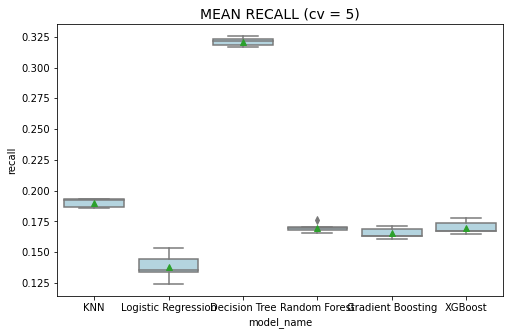

In [ ]:
baseline_models = [
                    KNeighborsClassifier(),
                    LogisticRegression(random_state=42),
                    DecisionTreeClassifier(random_state=42),
                    RandomForestClassifier(random_state=42),
                    GradientBoostingClassifier(random_state=42),
#                     SVC(probability=True,random_state=42),
                    XGBClassifier(random_state=42)
          ]

baseline_models_strings = [
                            "KNN",
                            "Logistic Regression",
                            "Decision Tree",
                            "Random Forest",
                            "Gradient Boosting",
                            #"Support Vector",
                            "XGBoost"
          ]


entries = []

for i in range(len(baseline_models)):
    print("Fitting {} model ...".format(baseline_models_strings[i]))
    model = baseline_models[i]
    recalls = cross_val_score(model, X_train, y_train, scoring='recall', cv=5)
    print("%s model has roc = " %str(baseline_models_strings[i]), recalls)

    for idx, recall in enumerate(recalls):
      entries.append((baseline_models_strings[i], idx, recall))

cv_df = pd.DataFrame(entries, columns=['model_name', 'idx', 'recall'])

plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='recall',
            data=cv_df,
            color='lightblue',
            showmeans=True)
plt.title("MEAN RECALL (cv = 5)", size=14);

Fitting KNN model ...
KNN model has roc =  [0.70988758 0.71418698 0.70868073 0.71111432 0.71433104]
Fitting Decision Tree model ...
Decision Tree model has roc =  [0.59324269 0.59734182 0.5940266  0.59723489 0.59620819]
Fitting Logistic Regression model ...
Logistic Regression model has roc =  [0.81184789 0.81560966 0.80377559 0.80394911 0.81855482]
Fitting Random Forest model ...
Random Forest model has roc =  [0.79787331 0.79810573 0.79782014 0.7958997  0.80165558]
Fitting Gradient Boosting model ...
Gradient Boosting model has roc =  [0.83038676 0.83001467 0.82869544 0.82863507 0.83277105]
Fitting XGBoost model ...
XGBoost model has roc =  [0.82621763 0.82653518 0.82479954 0.82511154 0.82809168]


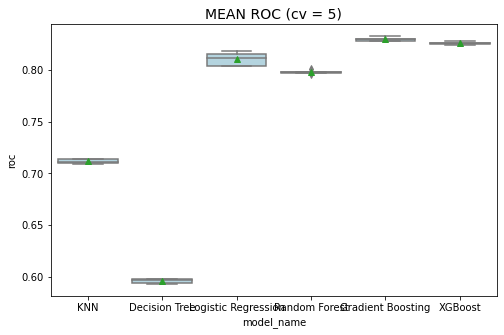

In [ ]:
baseline_models = [
                    KNeighborsClassifier(),
                    DecisionTreeClassifier(random_state=42),
                    LogisticRegression(random_state=42),
                    RandomForestClassifier(random_state=42),
                    GradientBoostingClassifier(random_state=42),
                    XGBClassifier(random_state=42)
          ]

baseline_models_strings = [
                            "KNN",
                            "Decision Tree",
                            "Logistic Regression",
                            "Random Forest",
                            "Gradient Boosting",
                            "XGBoost"
          ]


entries = []

for i in range(len(baseline_models)):
    print("Fitting {} model ...".format(baseline_models_strings[i]))
    model = baseline_models[i]
    ROCs = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=5)
    print("%s model has roc = " %str(baseline_models_strings[i]), ROCs)

    for idx, roc in enumerate(ROCs):
        entries.append((baseline_models_strings[i], idx, roc))

cv_df = pd.DataFrame(entries, columns=['model_name', 'idx', 'roc'])

plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='roc',
            data=cv_df,
            color='lightblue',
            showmeans=True)
plt.title("MEAN ROC (cv = 5)", size=14);

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.feature_selection import RFECV

In [ ]:
def make_RFE_selection(cls, metric, X_train, y_train, cv = 3):
    """
    cls : classifier used for recursive feature elemenation
    seed : seed used for reproducibility
    """
    from sklearn.metrics import make_scorer
    from sklearn.feature_selection import RFECV

    metric_score = make_scorer(metric)
    rfe_model = cls
    rfecv = RFECV(estimator=rfe_model, step=1, cv=StratifiedKFold(cv),
                  scoring=metric_score, n_jobs=-1)
    rfecv.fit(X_train, y_train)
    print("Optimal number of features : %d" % rfecv.n_features_)

    dset = pd.DataFrame()
    dset['features'] = X_train.columns[rfecv.support_]
    dset['importance'] = rfecv.estimator_.feature_importances_
    dset = dset.sort_values(by='importance')

    #Plot feature importance of selected features
    plt.barh(y=dset['features'], width=dset['importance'], color='#1976D2')
    plt.show()

    print(X_train.columns[rfecv.support_])

Optimal number of features : 13


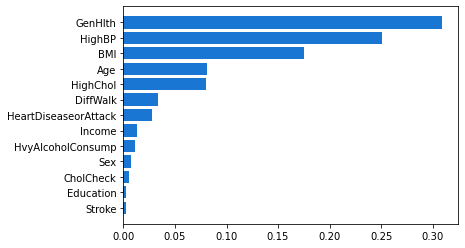

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke',
       'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',
       'Sex', 'Age', 'Education', 'Income'],
      dtype='object')


In [ ]:
make_RFE_selection(GradientBoostingClassifier(random_state=42), roc_auc_score,
                   X_train, y_train, cv = 3)

Optimal number of features : 20


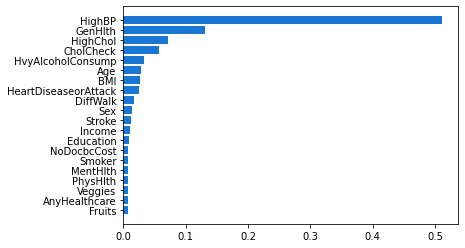

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')


In [ ]:
make_RFE_selection(XGBClassifier(random_state=42), roc_auc_score,
                   X_train, y_train, cv = 3)

Optimal number of features : 8


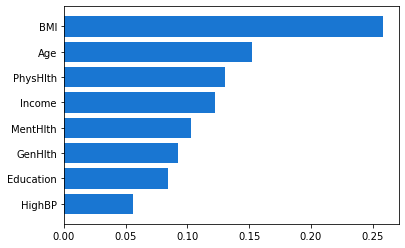

Index(['HighBP', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education',
       'Income'],
      dtype='object')


In [ ]:
make_RFE_selection(RandomForestClassifier(random_state=42), roc_auc_score,
                   X_train, y_train, cv = 3)

Optimal number of features : 18


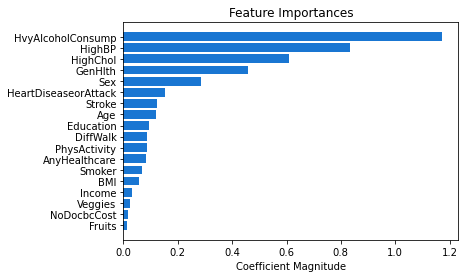

In [ ]:
# feature importance is not available for LR
# Therefore, performing variable selection for LR w/o function
from sklearn.linear_model import LogisticRegression
rocAuc_score = make_scorer(roc_auc_score)
rfeLR = LogisticRegression(random_state=42)
rfecv = RFECV(estimator=rfeLR, step=1, cv=StratifiedKFold(3),
              scoring=rocAuc_score, n_jobs=-1)
rfecv.fit(X_train, y_train)
print("Optimal number of features : %d" % rfecv.n_features_)

dset = pd.DataFrame()
dset['features'] = X_train.columns[rfecv.support_]
dset['importance'] = np.abs(rfecv.estimator_.coef_[0])
dset = dset.sort_values(by='importance')

# Plot feature importance of selected features
plt.barh(y=dset['features'], width=dset['importance'], color='#1976D2')
plt.title('Feature Importances')
plt.xlabel('Coefficient Magnitude')
plt.show()


Fitting Gradient Boosting model ...
Gradient Boosting model has roc =  [0.83028725 0.82978189 0.82848266 0.82846074 0.83256769]
Fitting XGBoost model ...
XGBoost model has roc =  [0.8267251  0.8273625  0.82508278 0.8259766  0.82895828]


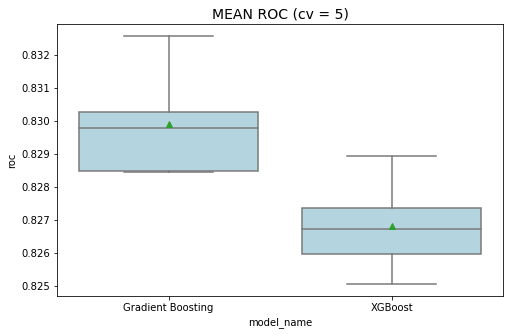

In [ ]:
fearure_selected= ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke',
                   'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',
                   'Sex', 'Age', 'Education', 'Income'
                  ]
baseline_models = [GradientBoostingClassifier(random_state=42),
                    XGBClassifier(random_state=42)
                  ]

baseline_models_strings = ["Gradient Boosting",
                            "XGBoost"
                          ]


entries = []

for i in range(len(baseline_models)):
    print("Fitting {} model ...".format(baseline_models_strings[i]))
    model = baseline_models[i]
    ROCs = cross_val_score(model, X_train[fearure_selected], y_train, scoring='roc_auc', cv=5)
    print("%s model has roc = " %str(baseline_models_strings[i]), ROCs)

    for idx, roc in enumerate(ROCs):
        entries.append((baseline_models_strings[i], idx, roc))

cv_df = pd.DataFrame(entries, columns=['model_name', 'idx', 'roc'])

plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='roc',
            data=cv_df,
            color='lightblue',
            showmeans=True)
plt.title("MEAN ROC (cv = 5)", size=14);

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score, classification_report
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier

def run_gridSearch(model, param_grid, cv_num=5, seed=42, threshold=0.25):
    # Set up the model pipeline
    model_hp = make_pipeline(model)

    # GridSearchCV setup
    stratified_kfold = StratifiedKFold(n_splits=cv_num, shuffle=True, random_state=seed)
    grid = GridSearchCV(model_hp, param_grid, cv=stratified_kfold, scoring='roc_auc', verbose=3)
    grid.fit(X_train[fearure_selected], y_train)

    # Display the ROC Curve
    y_pred_prob = grid.predict_proba(X_test[fearure_selected])[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Display the confusion matrix
    y_pred = grid.predict(X_test[fearure_selected])
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

    # Display the Precision-Recall Curve with Average Precision
    y_pred_proba = grid.predict_proba(X_test[fearure_selected])[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
    average_precision = average_precision_score(y_test, y_pred_proba)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall Curve (Average Precision = {average_precision:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

    print(grid.best_params_)

    return grid


Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV 1/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.825 total time=   7.2s
[CV 2/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.830 total time=   7.5s
[CV 3/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.829 total time=   7.9s
[CV 1/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.001, xgbclassi

[CV 2/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=500, xgbclassifier__subsample=0.8;, score=0.829 total time=  45.4s
[CV 3/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=500, xgbclassifier__subsample=0.8;, score=0.828 total time=  45.5s
[CV 1/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.821 total time= 1.5min
[CV 2/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=1000, xgbclassifie

[CV 1/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.823 total time=  15.8s
[CV 2/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.827 total time=  15.3s
[CV 3/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.826 total time=  15.5s
[CV 1/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=500, xgbclassif

[CV 3/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=500, xgbclassifier__subsample=0.8;, score=0.810 total time= 1.7min
[CV 1/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.791 total time= 3.9min
[CV 2/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.793 total time= 4.2min
[CV 3/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=1000, xgbclassifi

[CV 2/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=100, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.828 total time=  12.1s
[CV 3/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=100, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.826 total time=  12.0s
[CV 1/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=100, xgbclassifier__n_estimators=500, xgbclassifier__subsample=0.8;, score=0.823 total time= 1.2min
[CV 2/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=100, xgbclassifier__n_estimators=500, xgbclassifier_

[CV 1/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=100, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.795 total time= 7.4min
[CV 2/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=100, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.798 total time= 2.6min
[CV 3/3] END xgbclassifier__alpha=0.1, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=100, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.796 total time= 2.8min
[CV 1/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=100, xgbclassifie

[CV 2/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.824 total time=   6.2s
[CV 3/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.824 total time=   6.2s
[CV 1/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=500, xgbclassifier__subsample=0.8;, score=0.827 total time=  35.1s
[CV 2/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=500, xgbclassif

[CV 1/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.819 total time= 1.2min
[CV 2/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.823 total time= 1.2min
[CV 3/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.823 total time= 1.1min
[CV 1/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=100, xgb

[CV 2/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.824 total time=   7.2s
[CV 3/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.824 total time=  10.4s
[CV 1/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=500, xgbclassifier__subsample=0.8;, score=0.827 total time=  51.2s
[CV 2/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=500, xgbclassif

[CV 1/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.819 total time=32.3min
[CV 2/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.823 total time=18.1min
[CV 3/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.823 total time=16.7min
[CV 1/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=100, xgbclassifier__n_estimators=100, xgbclassif

[CV 3/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=100, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.823 total time=   6.4s
[CV 1/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=100, xgbclassifier__n_estimators=500, xgbclassifier__subsample=0.8;, score=0.827 total time=  41.5s
[CV 2/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=100, xgbclassifier__n_estimators=500, xgbclassifier__subsample=0.8;, score=0.831 total time=  41.7s
[CV 3/3] END xgbclassifier__alpha=10.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=100, xgbclassifier__n_estimators=500, xgbclassifier_

[CV 1/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=100, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.790 total time=  24.2s
[CV 2/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=100, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.793 total time=  22.5s
[CV 3/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=100, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.792 total time=  21.3s
[CV 1/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=10, xgbclassifier__n_estimator

[CV 2/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.763 total time=   2.1s
[CV 3/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.760 total time=   2.0s
[CV 1/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=500, xgbclassifier__subsample=0.8;, score=0.780 total time=  11.3s
[CV 2/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=500

[CV 3/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=500, xgbclassifier__subsample=0.8;, score=0.817 total time=  13.9s
[CV 1/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.817 total time=  29.4s
[CV 2/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.821 total time=  30.2s
[CV 3/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=0.5, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=10, xgbclassifier__n_estimators=1000,

[CV 1/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.760 total time=   2.2s
[CV 2/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.763 total time=   2.1s
[CV 3/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=100, xgbclassifier__subsample=0.8;, score=0.760 total time=   2.1s
[CV 1/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.001, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=500, xgbcla

[CV 3/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=500, xgbclassifier__subsample=0.8;, score=0.817 total time=  14.7s
[CV 1/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.817 total time=  31.4s
[CV 2/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=1000, xgbclassifier__subsample=0.8;, score=0.821 total time=  34.9s
[CV 3/3] END xgbclassifier__alpha=1000.0, xgbclassifier__colsample_bytree=0.8, xgbclassifier__lambda=1, xgbclassifier__learning_rate=0.01, xgbclassifier__max_depth=50, xgbclassifier__n_estimators=1000, xgbclas

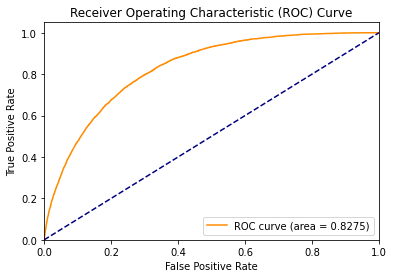

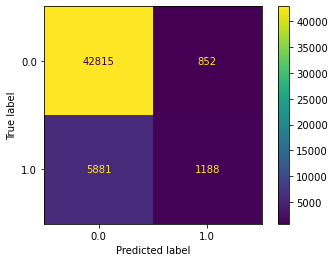

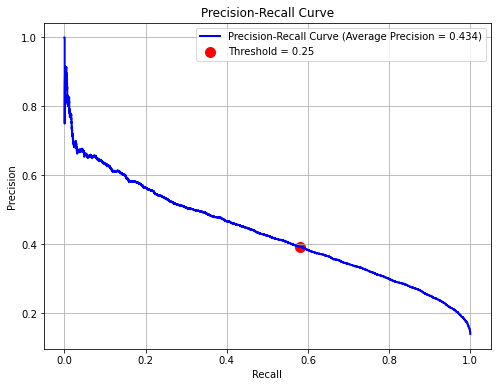

{'xgbclassifier__alpha': 10.0, 'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__lambda': 0.5, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 10, 'xgbclassifier__n_estimators': 1000, 'xgbclassifier__subsample': 0.8}


In [ ]:
param_grid_xgb = {
    'xgbclassifier__n_estimators': [100, 500, 1000],
    'xgbclassifier__learning_rate': [0.001, 0.01],
    'xgbclassifier__max_depth': [10, 50, 100],
    'xgbclassifier__colsample_bytree': [0.8],
    'xgbclassifier__subsample': [0.8]

    ,'xgbclassifier__alpha': np.logspace(-1, 3, 3),
    'xgbclassifier__lambda': [0.1, 0.5, 1]
}
xgb_grid = run_gridSearch(XGBClassifier(), param_grid_xgb, cv_num=3)

Fitting 3 folds for each of 192 candidates, totalling 576 fits
[CV 1/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=0.8;, score=0.824 total time=   1.5s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=0.8;, score=0.829 total time=   1.6s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboo

[CV 3/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=1;, score=0.828 total time=   1.4s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=0.8;, score=0.826 total time=   2.8s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier

[CV 2/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=1;, score=0.831 total time=   2.7s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=1;, score=0.830 total time=   2.7s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier_

[CV 1/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=1;, score=0.827 total time=   5.2s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=1;, score=0.832 total time=   5.3s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier_

[CV 3/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=0.8;, score=0.829 total time=   2.9s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=1;, score=0.825 total time=   3.2s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier_

[CV 2/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=0.8;, score=0.832 total time=   5.8s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=0.8;, score=0.831 total time=   5.8s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassif

[CV 1/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=0.8;, score=0.827 total time=  11.5s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=0.8;, score=0.832 total time=  11.5s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassif

[CV 3/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=1;, score=0.831 total time=   7.8s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=0.8;, score=0.826 total time=   2.0s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier

[CV 2/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=1;, score=0.831 total time=   2.0s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=1;, score=0.830 total time=   2.0s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n

[CV 1/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=1;, score=0.827 total time=   3.9s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=1;, score=0.832 total time=   3.9s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier_

[CV 3/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=0.8;, score=0.830 total time=  17.3s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=1;, score=0.827 total time=  19.6s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifie

[CV 2/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=0.8;, score=0.831 total time=   4.8s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=0.8;, score=0.831 total time=   4.4s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifie

[CV 1/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=0.8;, score=0.827 total time=   9.1s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=0.8;, score=0.832 total time=   9.0s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassif

[CV 3/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=1;, score=0.817 total time=   2.8s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=0.8;, score=0.817 total time=   5.8s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassi

[CV 2/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=1;, score=0.821 total time=   5.6s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=1;, score=0.821 total time=   5.7s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifi

[CV 1/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=1;, score=0.812 total time=   1.4s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=1;, score=0.815 total time=   1.4s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier

[CV 3/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=0.8;, score=0.812 total time=   6.1s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=1;, score=0.809 total time=   6.6s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassi

[CV 2/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=0.8;, score=0.821 total time=  12.2s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=0.8;, score=0.821 total time=  12.1s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclas

[CV 1/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=0.8;, score=0.801 total time=   3.3s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=0.8;, score=0.803 total time=   3.5s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassi

[CV 3/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=1;, score=0.821 total time=   3.0s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=0.8;, score=0.819 total time=   4.7s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassif

[CV 2/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=1;, score=0.823 total time=   4.6s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=1;, score=0.823 total time=   5.6s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifi

[CV 1/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=1;, score=0.823 total time=  10.4s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=1;, score=0.827 total time=  10.0s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=sqrt, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifi

[CV 3/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=0.8;, score=0.818 total time=   5.4s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=50, gradientboostingclassifier__subsample=1;, score=0.813 total time=   8.0s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifi

[CV 2/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=0.8;, score=0.821 total time=  12.8s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=100, gradientboostingclassifier__subsample=0.8;, score=0.822 total time=  11.2s
[CV 1/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=1, gradientboostingclassifier__min_samples_split=4, gradientboostingclas

[CV 1/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=0.8;, score=0.822 total time=  24.0s
[CV 2/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=0.8;, score=0.827 total time=  24.4s
[CV 3/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=2, gradientboostingclas

[CV 3/3] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__max_features=None, gradientboostingclassifier__min_samples_leaf=2, gradientboostingclassifier__min_samples_split=4, gradientboostingclassifier__n_estimators=200, gradientboostingclassifier__subsample=1;, score=0.826 total time=  27.2s


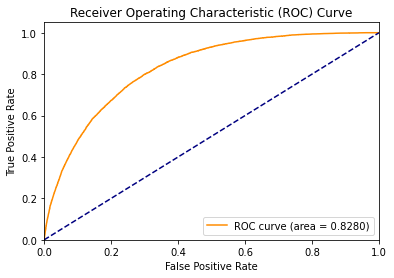

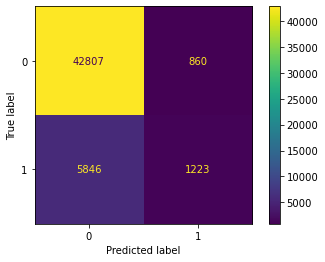

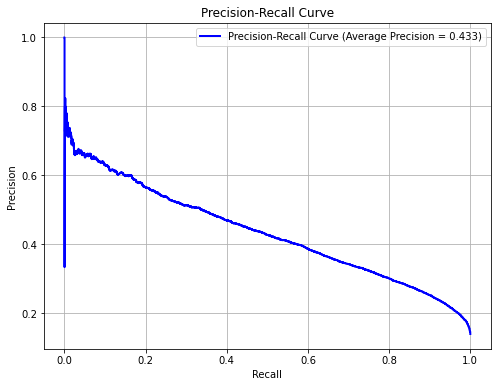

{'gradientboostingclassifier__learning_rate': 0.1, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__max_features': None, 'gradientboostingclassifier__min_samples_leaf': 2, 'gradientboostingclassifier__min_samples_split': 2, 'gradientboostingclassifier__n_estimators': 200, 'gradientboostingclassifier__subsample': 0.8}


In [ ]:
param_grid_gbm = {
    'gradientboostingclassifier__n_estimators': [50, 100, 200],
    'gradientboostingclassifier__learning_rate': [0.1, 0.01],
    'gradientboostingclassifier__max_depth': [3, 5],
    'gradientboostingclassifier__min_samples_split': [2, 4],
    'gradientboostingclassifier__min_samples_leaf': [1,2],
    'gradientboostingclassifier__subsample': [0.8, 1],
    'gradientboostingclassifier__max_features': ['sqrt', None]
}
gbm_grid = run_gridSearch(GradientBoostingClassifier(), param_grid_gbm, cv_num = 3,)

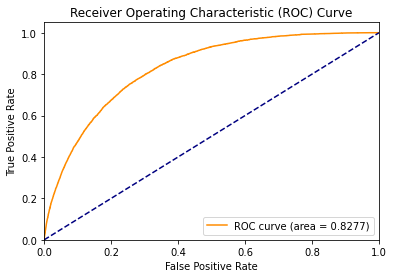

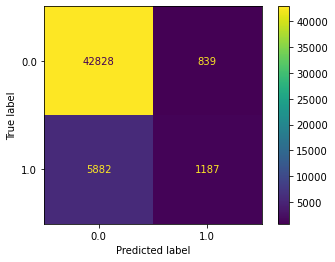

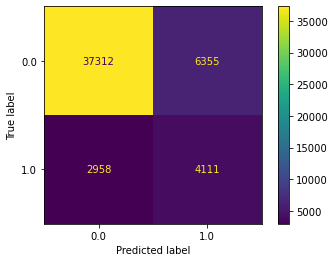

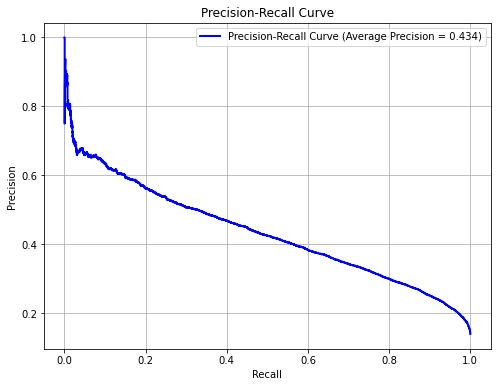

results with 0.5 threshold 
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43667
         1.0       0.59      0.17      0.26      7069

    accuracy                           0.87     50736
   macro avg       0.73      0.57      0.59     50736
weighted avg       0.84      0.87      0.83     50736

results with 0.25 threshold 
              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     43667
         1.0       0.39      0.58      0.47      7069

    accuracy                           0.82     50736
   macro avg       0.66      0.72      0.68     50736
weighted avg       0.85      0.82      0.83     50736



In [ ]:


X_train_preprocessed = X_train[fearure_selected]
X_test_preprocessed = X_test[fearure_selected]


model = XGBClassifier(n_estimators=1000,
                          learning_rate=0.01,
                          max_depth=10,
                          colsample_bytree=0.8,
                          subsample=0.8,
                          reg_alpha=10, # L1 regularization
                          reg_lambda=0.5, # L2 regularization
                          gamma=1)


model.fit(X_train_preprocessed, y_train)


y_pred = model.predict(X_test_preprocessed)
y_pred_prob = model.predict_proba(X_test_preprocessed)[:,1]
y_pred_custom = np.where(y_pred_prob > 0.25, 1, 0)

from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# evaluation on Test

threshold = 0.25

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# closest_threshold_index = np.argmin(np.abs(thresholds - threshold))
# plt.scatter(fpr[closest_threshold_index], tpr[closest_threshold_index],
#             c='r', marker='o', s=100, label=f'Threshold = {thresholds[closest_threshold_index]:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# confusion matrix - threshold 0.5
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# confusion matrix - threshold 0.25
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Precision-Recall Curve with Average Precision
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall Curve (Average Precision = {average_precision:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# closest_threshold_index = np.argmin(np.abs(thresholds - threshold))
# plt.scatter(recall[closest_threshold_index], precision[closest_threshold_index],
#             c='r', marker='o', s=100, label=f'Threshold = {thresholds[closest_threshold_index]:.2f}')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

print("results with 0.5 threshold \n", "="*40)
print(classification_report(y_test, y_pred))

print("results with 0.25 threshold \n", "="*40)
print(classification_report(y_test, y_pred_custom))

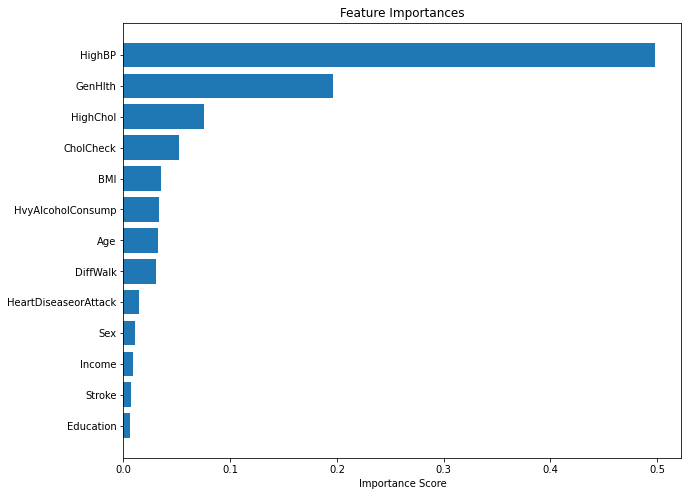

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
feature_importances = model.feature_importances_

# Get feature names
feature_names = X_train_preprocessed.columns

# Sort the feature importances in descending order and get the indices
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


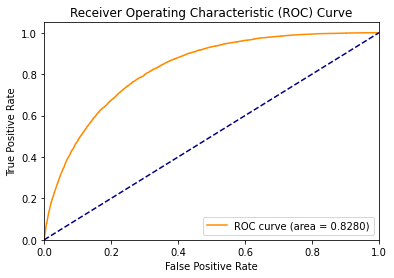

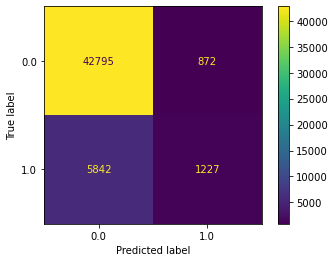

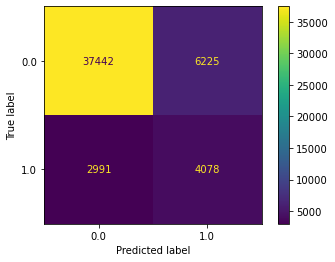

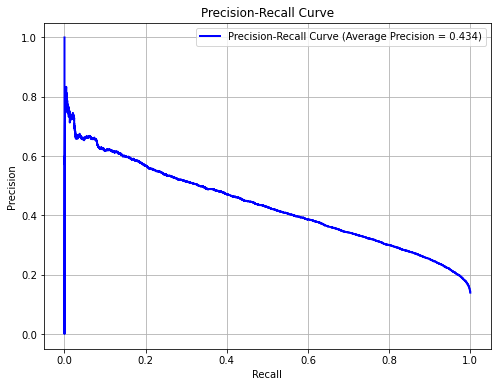

results with 0.5 threshold 
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43667
         1.0       0.58      0.17      0.27      7069

    accuracy                           0.87     50736
   macro avg       0.73      0.58      0.60     50736
weighted avg       0.84      0.87      0.84     50736

results with 0.25 threshold 
              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89     43667
         1.0       0.40      0.58      0.47      7069

    accuracy                           0.82     50736
   macro avg       0.66      0.72      0.68     50736
weighted avg       0.85      0.82      0.83     50736



In [ ]:


X_train_preprocessed = X_train[fearure_selected]
X_test_preprocessed = X_test[fearure_selected]


model = GradientBoostingClassifier(
                          learning_rate=0.1,
                          max_depth=3
                      ,max_features = None
                      ,min_samples_leaf = 2
                      ,min_samples_split = 2
                      ,n_estimators = 200
                      ,subsample = 0.8
                     )


model.fit(X_train_preprocessed, y_train)


y_pred = model.predict(X_test_preprocessed)
y_pred_prob = model.predict_proba(X_test_preprocessed)[:,1]
y_pred_custom = np.where(y_pred_prob > 0.25, 1, 0)

from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# evaluation on Test

threshold = 0.25

# Display the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# closest_threshold_index = np.argmin(np.abs(thresholds - threshold))
# plt.scatter(fpr[closest_threshold_index], tpr[closest_threshold_index],
#             c='r', marker='o', s=100, label=f'Threshold = {thresholds[closest_threshold_index]:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Display the confusion matrix - threshold 0.5
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Display the confusion matrix - threshold 0.25
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Display the Precision-Recall Curve with Average Precision
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall Curve (Average Precision = {average_precision:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
# closest_threshold_index = np.argmin(np.abs(thresholds - threshold))
# plt.scatter(recall[closest_threshold_index], precision[closest_threshold_index],
#             c='r', marker='o', s=100, label=f'Threshold = {thresholds[closest_threshold_index]:.2f}')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

print("results with 0.5 threshold \n", "="*40)
print(classification_report(y_test, y_pred))

print("results with 0.25 threshold \n", "="*40)
print(classification_report(y_test, y_pred_custom))

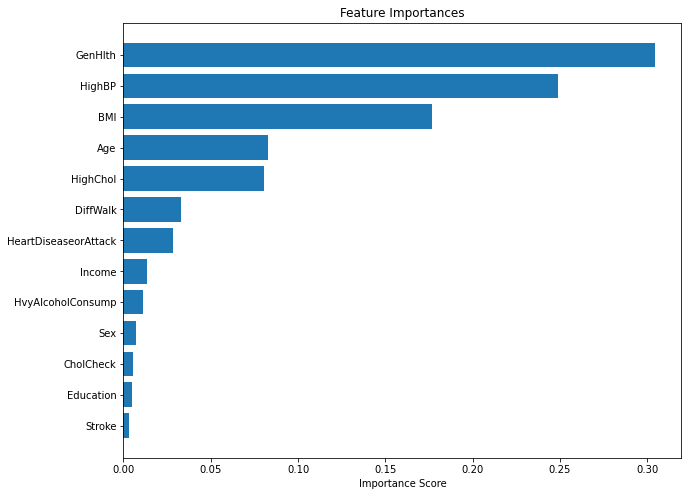

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
feature_importances = model.feature_importances_

# Get feature names
feature_names = X_train_preprocessed.columns

# Sort the feature importances in descending order and get the indices
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Apply SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)


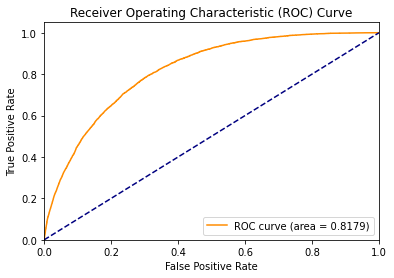

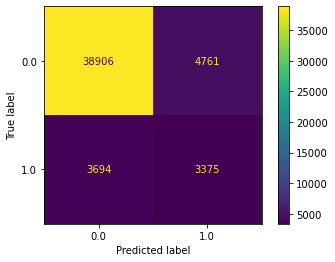

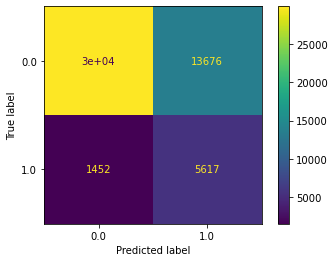

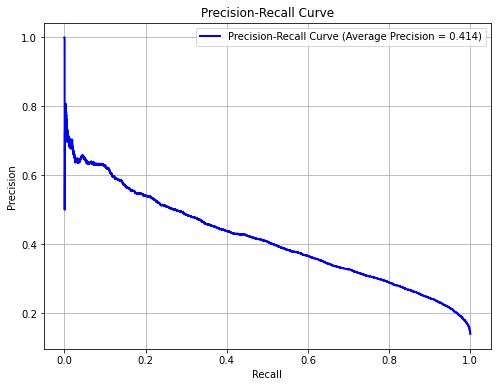

results with 0.5 threshold 
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90     43667
         1.0       0.41      0.48      0.44      7069

    accuracy                           0.83     50736
   macro avg       0.66      0.68      0.67     50736
weighted avg       0.84      0.83      0.84     50736

results with 0.25 threshold 
              precision    recall  f1-score   support

         0.0       0.95      0.69      0.80     43667
         1.0       0.29      0.79      0.43      7069

    accuracy                           0.70     50736
   macro avg       0.62      0.74      0.61     50736
weighted avg       0.86      0.70      0.75     50736



In [ ]:
# Define the model
model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    max_features=None,
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    subsample=0.8
)

# Fit the model on the oversampled data
model.fit(X_train_resampled, y_train_resampled)

# Prediction
y_pred = model.predict(X_test_preprocessed)
y_pred_prob = model.predict_proba(X_test_preprocessed)[:, 1]
y_pred_custom = np.where(y_pred_prob > 0.25, 1, 0)

# Evaluation on Test
threshold = 0.25

# Display the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# confusion matrix - threshold 0.5
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# confusion matrix - threshold 0.25
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Precision-Recall Curve with Average Precision
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
average_precision = average_precision_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label=f'Precision-Recall Curve (Average Precision = {average_precision:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

print("results with 0.5 threshold \n", "="*40)
print(classification_report(y_test, y_pred))

print("results with 0.25 threshold \n", "="*40)
print(classification_report(y_test, y_pred_custom))